In [18]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

In [19]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('OV.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_OV(np_data)
num_groups = 5

In [32]:
pd.DataFrame(np_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,TCGA-36-2540,OV,26,FEMALE,Stage IIIC,Serous Cystadenocarcinoma,G1,2008,Alive,WITH TUMOR,#N/A,Recurrence,665,Complete Remission/Response
1,TCGA-61-2017,OV,64,FEMALE,Stage IIIC,Serous Cystadenocarcinoma,G1,2005,Alive,WITH TUMOR,#N/A,Recurrence,1006,Complete Remission/Response
2,TCGA-61-1721,OV,38,FEMALE,Stage IV,Serous Cystadenocarcinoma,G1,2008,Alive,TUMOR FREE,#N/A,#N/A,#N/A,Complete Remission/Response
3,TCGA-09-1675,OV,50,FEMALE,Stage IC,Serous Cystadenocarcinoma,G2,2001,Alive,TUMOR FREE,#N/A,#N/A,#N/A,Complete Remission/Response
4,TCGA-61-2096,OV,56,FEMALE,Stage IC,Serous Cystadenocarcinoma,G2,2003,Alive,TUMOR FREE,#N/A,Recurrence,421,Progressive Disease


In [31]:
len(pd.DataFrame(np_data).columns)

14

**Vital status**

In class model:
Average train final cost: nan
Average train accuracy: 39.01 %
Average train F1 score: 0.40
Average test accuracy: 35.97 %
Average test F1 score: 0.37


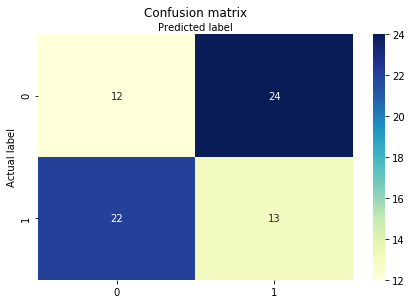


Scikit model:
Average train final cost: 6.58
Average train accuracy: 80.94 %
Average train F1 score: 0.79
Average test final cost: 6.87
Average test accuracy: 80.10 %
Average test F1 score: 0.78
Average Gaussian Naive Bayes accuracy: 82.05 %


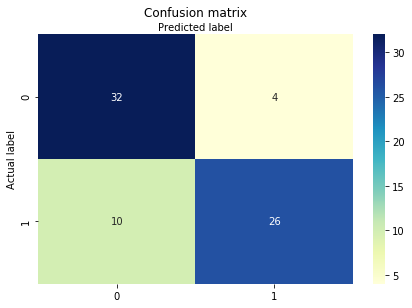


Highest average weights (absolute values!):
tumor_status : 13.64
new_tumor_event_type : 7.56
clinical_stage : 2.82


In [3]:
y = vital_status
iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

**Death days to**

In [4]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 4000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: nan
Mean in y: 1276.39
Variance in y: 588693.39

Scikit model:
Average train accuracy: 25.65 %
Average test accuracy: 25.02 %


**Outcome**

In class model:
One vs all:
Average train accuracy: 49.79 %
Average train F1 score: 0.07
Average test accuracy: 49.17 %
Average test F1 score: 0.08


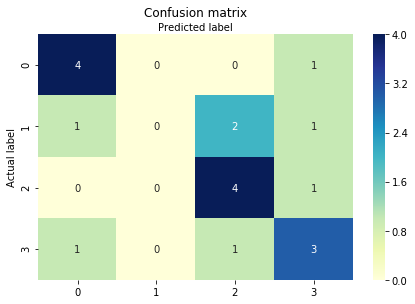


Scikit model:
Average train accuracy: 49.79 %
Average train F1 score: 0.44
Average test accuracy: 48.33 %
Average test F1 score: 0.43
Average Gaussian Naive Bayes accuracy: 35.83 %


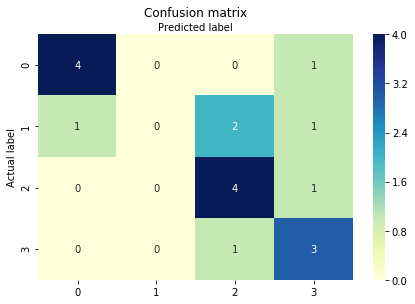


Highest average weights (absolute values!):
tumor_status : 8.59
new_tumor_event_type : 5.39
histological_grade : 3.44


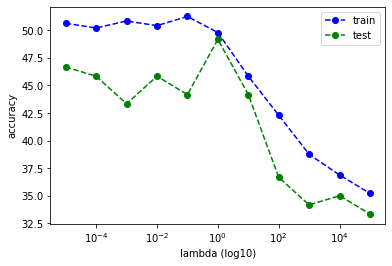

In [17]:
y = outcome
lambda_val = 1
interested_in = [0, 1, 2, 3]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)